# Árboles de Decisión - Parte I (1)
Utiliza el conjunto de datos "iris" cargado previamente en el dataframe

```
from iris_info import iris_dict
# Convertir el diccionario a DataFrame
iris_df = pd.DataFrame(iris_dict)
```

Realiza los siguientes pasos:

1. Crea un histograma para la distribución de la longitud de sépalo `"sepal_length"`

2. Usa el color azul para las barras del histograma

3. Titulo del gráfico: `'Distribución de la longitud de sépalo'`

4. Eje x: `'Longitud de sépalo'`

5. Eje y: `'Frecuencia'`

6. Activa la rejilla del gráfico (`grid`)

<function matplotlib.pyplot.show(close=None, block=None)>

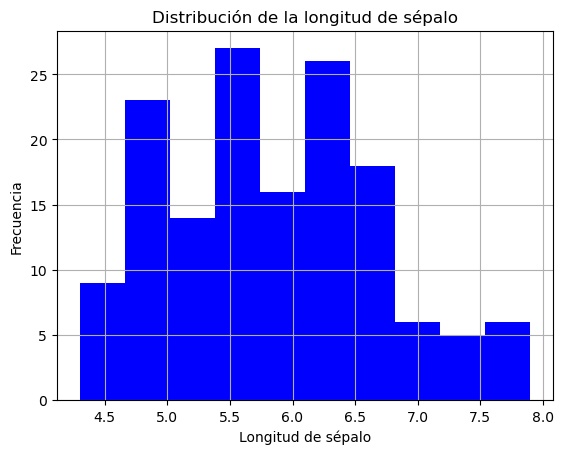

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from data.iris_info import iris_dict
# from iris_info import iris_dict  # Udemy usa esto!!


# Convertir el diccionario a DataFrame
iris_df: pd.DataFrame = pd.DataFrame(iris_dict)

plt.hist(iris_df['sepal_length'], color='blue')
plt.title('Distribución de la longitud de sépalo')
plt.xlabel('Longitud de sépalo')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.show
